In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('wildfires.sqlite')

# Create a cursor object
cursor = conn.cursor()

# Fetch the table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Select the first table name
table_name = table_names[21][0]  # Assuming there is at least one table in the database

In [3]:
table_names

[('spatial_ref_sys',),
 ('spatialite_history',),
 ('sqlite_sequence',),
 ('geometry_columns',),
 ('spatial_ref_sys_aux',),
 ('views_geometry_columns',),
 ('virts_geometry_columns',),
 ('geometry_columns_statistics',),
 ('views_geometry_columns_statistics',),
 ('virts_geometry_columns_statistics',),
 ('geometry_columns_field_infos',),
 ('views_geometry_columns_field_infos',),
 ('virts_geometry_columns_field_infos',),
 ('geometry_columns_time',),
 ('geometry_columns_auth',),
 ('views_geometry_columns_auth',),
 ('virts_geometry_columns_auth',),
 ('sql_statements_log',),
 ('SpatialIndex',),
 ('ElementaryGeometries',),
 ('KNN',),
 ('Fires',),
 ('idx_Fires_Shape',),
 ('idx_Fires_Shape_node',),
 ('idx_Fires_Shape_rowid',),
 ('idx_Fires_Shape_parent',),
 ('NWCG_UnitIDActive_20170109',)]

In [4]:
# Execute a query to fetch data from the selected table
cursor.execute(f"SELECT * FROM {table_name}")

# Fetch all the results and store them as a list of tuples
data = cursor.fetchall()

# Get column names from cursor description
columns = [col[0] for col in cursor.description]

# Close the cursor and the connection
cursor.close()
conn.close()

# Create a DataFrame from the fetched data
df = pd.DataFrame(data, columns=columns)

In [5]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [6]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [7]:
df.shape

(1880465, 39)

In [8]:
df2 = df[['FOD_ID','FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE', 'FIRE_NAME', 'DISCOVERY_DATE', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'FIRE_SIZE']]
df2.head()

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,1.0,Lightning,2453189.5,0.10


In [9]:
state_gb = df2.groupby('STATE').count()
def prop(count):
    return count/df.shape[0]
state_props = state_gb['FOD_ID'].apply(prop)
state_props = pd.DataFrame(state_props).sort_values(by='FOD_ID', ascending = False)
state_props

,FOD_ID
STATE,
CA,0.100800
GA,0.089801
TX,0.075524
NC,0.059175
FL,0.047999
SC,0.043242
NY,0.043005
MS,0.042133
AZ,0.038068


In [10]:
state_props.iloc[:10].get('FOD_ID').sum()

0.5751486999226256

# Charlie's EDA

- Comparing size, duration, and date of discovery over seasons and geographic areas of the US
- Frequency of fires needs the size of the state to be accounted for, I also think we should get rid of AK and HI to make our lives easier (only for regional analyses)

- To do:

- Make plot for size vs seasons
- Make plot for duration vs seasons
- Make plot for date of discovery vs seasons

- Make geoplot for size vs region
- Make geoplot for duration vs region
- Make geoplot for date of discovery vs region


In [11]:
import matplotlib.pyplot as plt

In [65]:
df3 = df[['FOD_ID','FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE', 'FIRE_NAME', 'DISCOVERY_DATE', 'DISCOVERY_DOY','FIRE_YEAR','STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'FIRE_SIZE']]
df3.head()

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_YEAR,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,33,2005,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,133,2004,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,152,2004,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,180,2004,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,180,2004,1.0,Lightning,2453189.5,0.10


<AxesSubplot:xlabel='DISCOVERY_DOY', ylabel='FIRE_SIZE'>

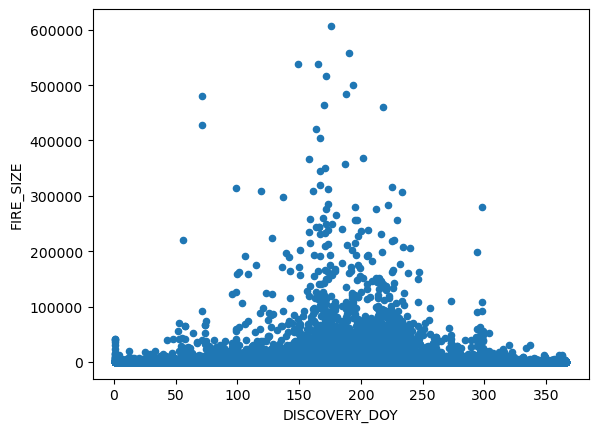

In [66]:
df3.plot(kind='scatter', x='DISCOVERY_DOY', y='FIRE_SIZE')

In [68]:
df3.plot(kind='bar', x='FIRE_YEAR', y='FIRE_SIZE')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe277c78f70> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='FIRE_SIZE', ylabel='Duration'>

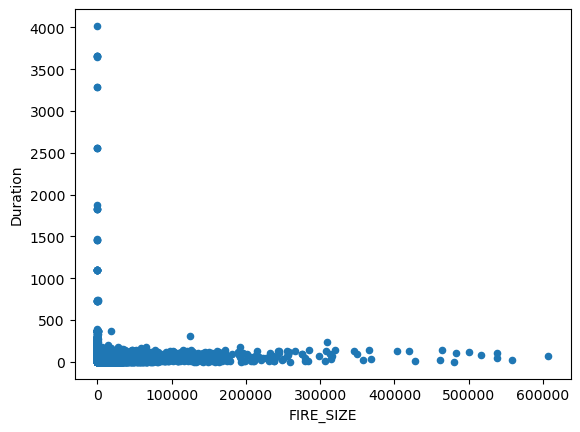

In [14]:
df2=df2.assign(Duration=df2['CONT_DATE']-df2['DISCOVERY_DATE'])
df2.plot(kind='scatter',x='FIRE_SIZE',y='Duration')

In [51]:
top200large = df2.sort_values('FIRE_SIZE',ascending=False).iloc[:200]

/var/folders/ch/hyjw6whx3g9gshnp58738jc80000gp/T/ipykernel_32085/1217228331.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


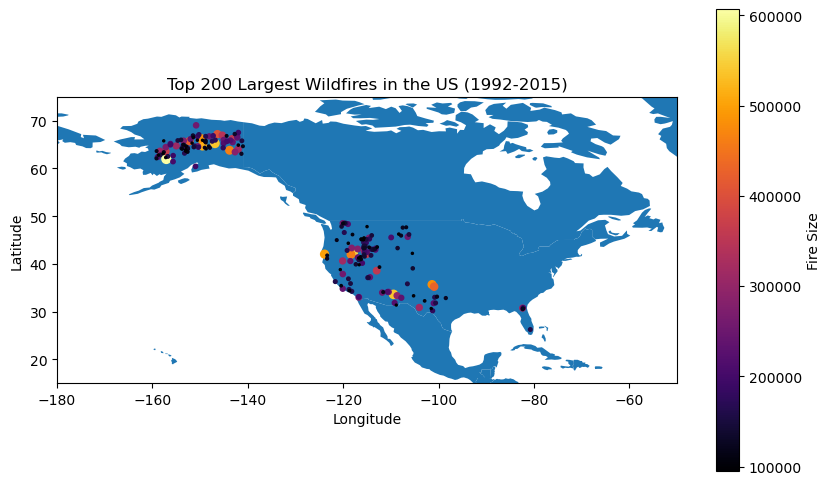

In [62]:
from shapely.geometry import Point
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import geopandas as gpd
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(top200large['LONGITUDE'], top200large['LATITUDE'])]
gdf = gpd.GeoDataFrame(top200large, geometry=geometry)

# Plot the fire locations
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(10, 6))

# Set the x and y limits to zoom in on the continental US and Alaska
base.set_xlim(-180, -50)  # Longitudes from Alaska to the East Coast
base.set_ylim(15, 75)     # Latitudes from Mexico to the Northern border of Alaska

# Normalize fire size for color mapping
norm = mcolors.Normalize(vmin=gdf['FIRE_SIZE'].min(), vmax=gdf['FIRE_SIZE'].max())
cmap = cm.inferno

# Get color values from colormap
colors = cmap(norm(gdf['FIRE_SIZE']))

# Define the range of marker sizes
min_marker_size = 2
max_marker_size = 40

# Normalize fire size for marker size mapping
size_norm = mcolors.Normalize(vmin=gdf['FIRE_SIZE'].min(), vmax=gdf['FIRE_SIZE'].max())

# Calculate marker sizes based on fire size
marker_sizes = np.interp(gdf['FIRE_SIZE'], (gdf['FIRE_SIZE'].min(), gdf['FIRE_SIZE'].max()), (min_marker_size, max_marker_size))

# Plot the points with a color gradient and variable marker sizes based on fire size
gdf.plot(ax=base, marker='o', color=colors, markersize=marker_sizes)


# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Fire Size')

# Add title and labels
plt.title('Top 200 Largest Wildfires in the US (1992-2015)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
top200long = df2.sort_values('Duration',ascending=False).iloc[:200]

/var/folders/ch/hyjw6whx3g9gshnp58738jc80000gp/T/ipykernel_32085/2763410084.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


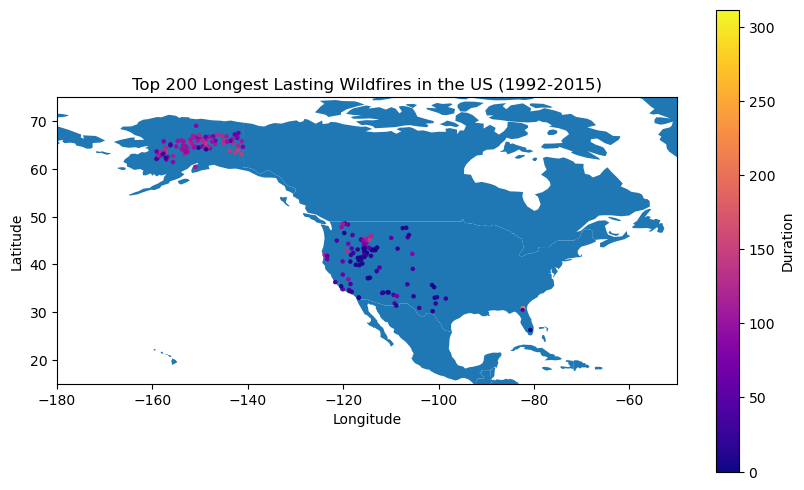

In [70]:
from shapely.geometry import Point
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import geopandas as gpd
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(top200large['LONGITUDE'], top200large['LATITUDE'])]
gdf = gpd.GeoDataFrame(top200large, geometry=geometry)

# Plot the fire locations
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(10, 6))

# Set the x and y limits to zoom in on the continental US and Alaska
base.set_xlim(-180, -50)  # Longitudes from Alaska to the East Coast
base.set_ylim(15, 75)     # Latitudes from Mexico to the Northern border of Alaska

# Normalize fire size for color mapping
norm = mcolors.Normalize(vmin=gdf['Duration'].min(), vmax=gdf['Duration'].max())
cmap = cm.plasma

# Get color values from colormap
colors = cmap(norm(gdf['Duration']))

# Plot the points with a color gradient based on fire size
gdf.plot(ax=base, marker='o', color=colors, markersize=5)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Duration')

# Add title and labels
plt.title('Top 200 Longest Lasting Wildfires in the US (1992-2015)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
df2